In [207]:
import numpy as np #Array Creation and Manipulation 
import pandas as pd # It is used to read the file I/P (eg :- pd.read_csv)
import seaborn as sb 
import matplotlib.pyplot as plt # It is used for EDA
from sklearn.model_selection import train_test_split # It is used for splitting the data 
from sklearn.preprocessing import  StandardScaler#used to standardize features by removing the mean and scaling to unit variance
from sklearn import metrics# It is used to find the accuracy and other outcomes
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression # It is used to import models
from sklearn.preprocessing import MinMaxScaler # used to normalize data.
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf # It is used to plot ACF and PACF
import warnings # It is used to suppress all warnings
warnings.filterwarnings('ignore')

In [208]:
store_sales = pd.read_csv(r"E:\project\train.csv\train.csv")
display(store_sales.head()) 
display(store_sales.tail())

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


## Droping Store and item column

In [209]:
store_sales = store_sales.drop(['store','item'],axis=1)


In [210]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


## Converting date from object datatype to daytime datatype

In [211]:
store_sales['date'] = pd.to_datetime(store_sales['date'])

In [212]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


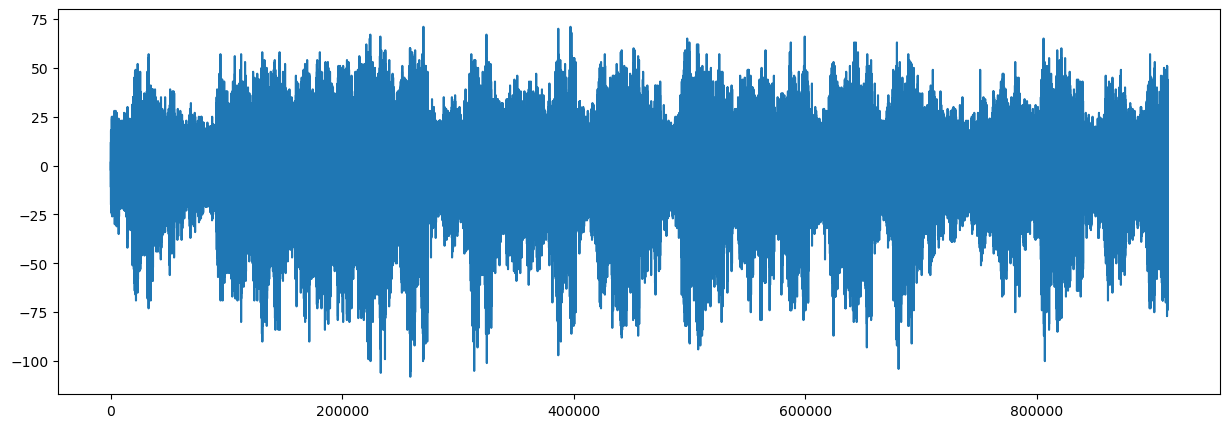

In [213]:
plt.figure(figsize=(15,5))
plt.plot(store_sales.sales.diff())

## Converting data to a Month period ,and the sum the number of items in each month

In [214]:
store_sales['date'] = store_sales['date'].dt.to_period('M')
monthly_sales = store_sales.groupby('date').sum().reset_index()

In [215]:
# plt.figure(figsize=(15,5))
# plt.plot(monthly_sales.sales.diff())

In [216]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [217]:
monthly_sales = monthly_sales.set_index('date')

In [191]:
monthly_sales = np.log(monthly_sales) # it is used for smoothning  effect

In [192]:
monthly_sales.head(10)

,sales
date,
2013-01-01,13.027842
2013-02-01,13.037714
2013-03-01,13.333243
2013-04-01,13.433187
2013-05-01,13.545330
2013-06-01,13.586848
2013-07-01,13.659935
2013-08-01,13.549930
2013-09-01,13.444312


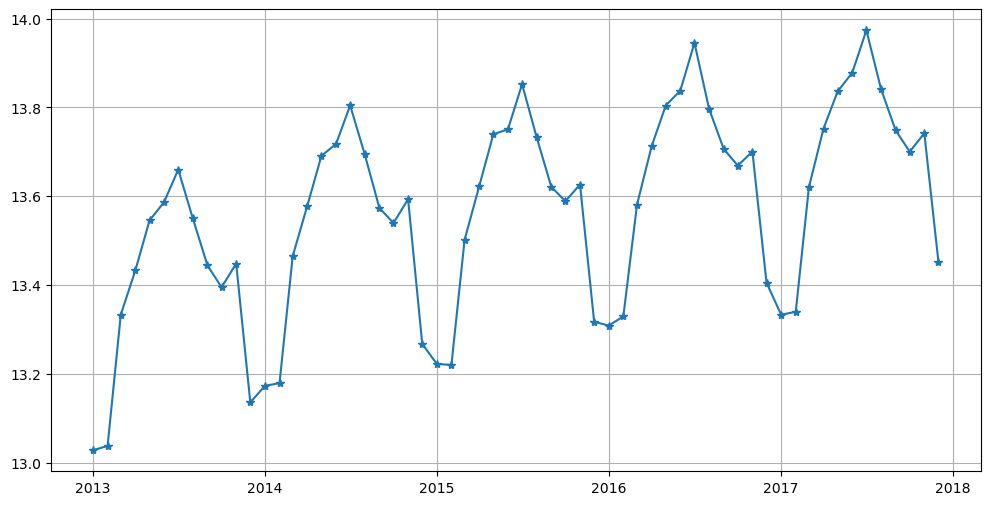

In [193]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales , marker='*' )
plt.grid();

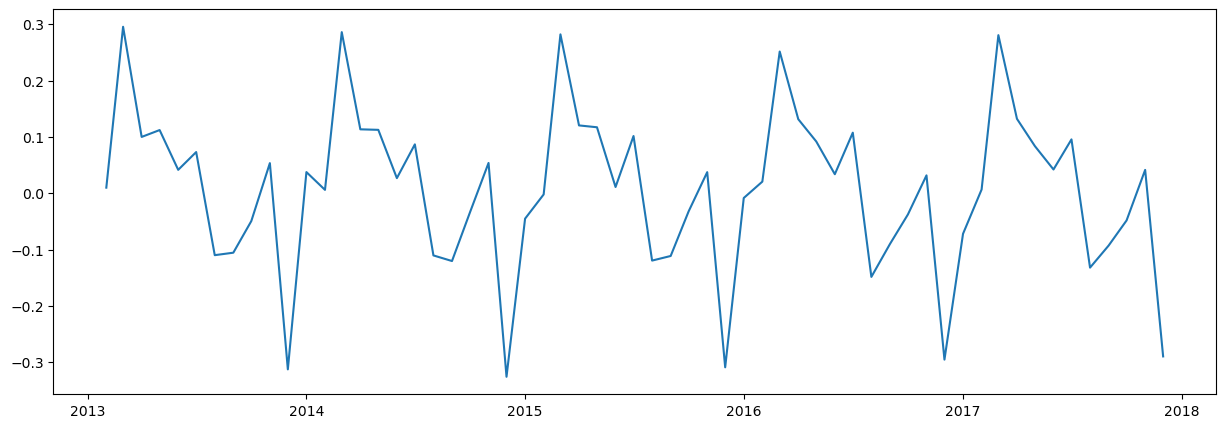

In [194]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales.diff())

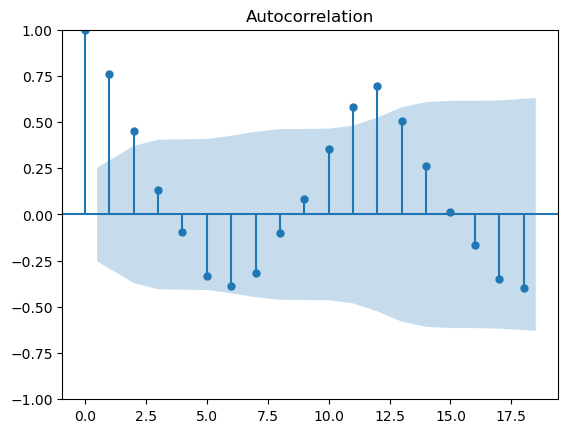

In [195]:
plot_acf(monthly_sales);

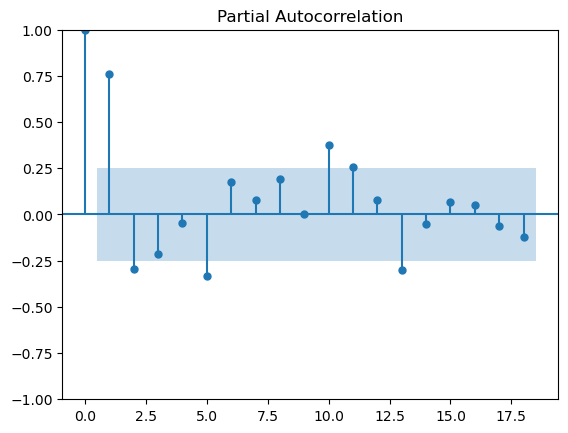

In [196]:
plot_pacf(monthly_sales);

In [197]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from  pmdarima import auto_arima

In [198]:
auto_arima(monthly_sales ,seasonal=True,m=12) # It will give the value of p,d,q

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [199]:
model_sarima = SARIMAX(monthly_sales ,order=(1,1,0) , seasonal_order=(1,1,1,12))

In [200]:
results = model_sarima.fit()

In [201]:
pred_log = results.predict(start=59 , end=71)

In [202]:
pred = np.exp(pred_log)

In [203]:
pred = np.round(pred)

In [204]:
pred

2017-12-01     689362.0
2018-01-01     681885.0
2018-02-01     694157.0
2018-03-01     903106.0
2018-04-01    1034113.0
2018-05-01    1119611.0
2018-06-01    1171611.0
2018-07-01    1295099.0
2018-08-01    1123002.0
2018-09-01    1025194.0
2018-10-01     981032.0
2018-11-01    1020936.0
2018-12-01     761462.0
Freq: MS, Name: predicted_mean, dtype: float64

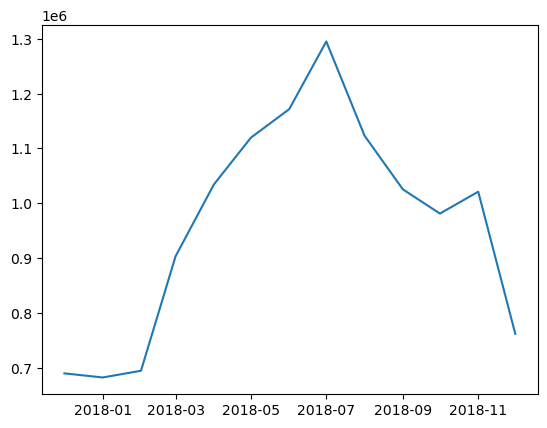

In [205]:
plt.plot(pred);

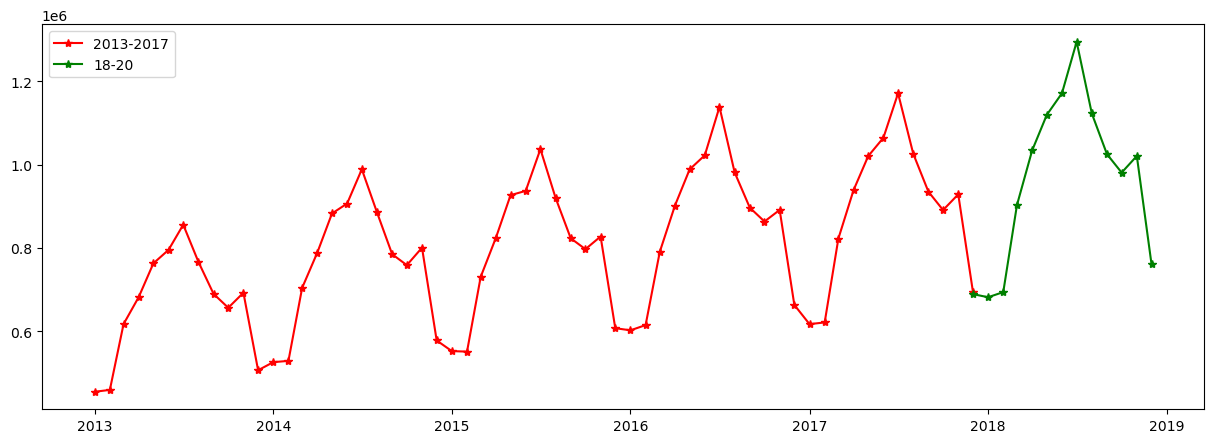

In [218]:
plt.figure(figsize=(15,5))
plt.plot( monthly_sales.sales, marker = '*' , color ='red' ,label='2013-2017')
plt.plot(pred          ,marker ='*' ,color='green',label='18-20')
plt.legend();

In [162]:
store_sales = pd.read_csv(r"E:\project\train.csv\train.csv")

In [163]:
store_sales = store_sales.drop(['store','item'],axis=1)


In [164]:
store_sales['date'] = pd.to_datetime(store_sales['date'])

In [165]:
store_sales['date'] = store_sales['date'].dt.to_period('M')
monthly_sales = store_sales.groupby('date').sum().reset_index()

In [166]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [167]:
monthly_sales = monthly_sales.set_index('date')
monthly_sales = np.log(monthly_sales)

In [168]:
monthly_sales.shape

(60, 1)

In [169]:
train_data = monthly_sales.iloc[0:48 ]
test_data = monthly_sales.iloc[48:60 ]

In [170]:
test_data

,sales
date,
2017-01-01,13.333120
2017-02-01,13.339680
2017-03-01,13.620307
2017-04-01,13.752424
2017-05-01,13.835986
2017-06-01,13.878132
2017-07-01,13.973704
2017-08-01,13.841571
2017-09-01,13.748583


In [171]:
auto_arima(train_data ,seasonal=True,m=12)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [172]:
model_sarima = SARIMAX(train_data ,order=(1,1,0) , seasonal_order=(1,1,0,12))

In [173]:
results = model_sarima.fit()

In [174]:
pred_log = results.predict(start=59 , end=71)

In [175]:
pred = np.exp(pred_log)

pred = np.round(pred)

actual = np.exp(test_data.sales)

eror = pred - actual

In [176]:
mse = np.mean(np.square(eror))

In [177]:
rsme_test= np.sqrt(mse)

In [178]:
mape_test = np.mean(np.abs(eror * 100 / actual))
mape_test
print(" Mape is :- ",mape_test)

 Mape is :-  1.170648906023038


In [179]:
acc_test = 100 - mape_test
acc_test
print("Accuracy is :- " ,acc_test)

Accuracy is :-  98.82935109397697
